In [3]:
#!/usr/bin/python
# -*- coding : utf-8 -*-

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Funzioni per importare msgpack o csv dei logs

In [5]:
def msg_to_df(file_path):
    storm_df = pd.read_msgpack(file_path)
    return storm_df

In [16]:
def csv_to_df(file_path):
    data_type={'DATE' : object, 'TOKEN' : object, 'MESSAGE' : object, 'TYPE' : object}
    storm_df = pd.read_csv(file_path)
    strom_df = pd.DataFrame(storm_df)
    return storm_df

Test for checking parsing through accessing different formats, time for elabs 

In [21]:
%time a = msg_to_df("/home/gabriele/Documenti/storm-frontend-server.log-20180901.msg")

CPU times: user 12.4 s, sys: 9.5 s, total: 21.9 s
Wall time: 32.4 s


^ usa circa 7gb di ram per 3,5 gb di log strutturato

In [22]:
print type(a)
print a.head(10)

<class 'pandas.core.frame.DataFrame'>
                 DATE     TIMESTAMP  TYPE THREAD  \
0  08/31 03:21:41.374  1.535686e+09  INFO     54   
1  08/31 03:21:41.381  1.535686e+09  INFO     61   
2  08/31 03:21:41.382  1.535686e+09  INFO     63   
3  08/31 03:21:41.401  1.535686e+09  INFO     60   
4  08/31 03:21:41.450  1.535686e+09  INFO      7   
5  08/31 03:21:41.597  1.535686e+09  INFO     62   
6  08/31 03:21:41.629  1.535686e+09  INFO      6   
7  08/31 03:21:41.668  1.535686e+09  INFO     59   
8  08/31 03:21:41.708  1.535686e+09  INFO     64   
9  08/31 03:21:41.716  1.535686e+09  INFO     68   

                                  TOKEN  \
0  c42e140a-ed4f-4c2f-9a8c-ae96f53e8627   
1  8728bd92-e1a4-472f-8c61-5630a1800cfc   
2  3d78753a-a9be-4363-abbf-e9b280d17fa8   
3  acedae59-b2ff-4f4a-8e9e-7c89aeca8017   
4  88855d01-dc10-4ce5-8c3f-5d2b896ead61   
5  3328892d-8719-4203-b19a-ac04ea30e34a   
6  562e6cc5-6040-495c-afa7-34bc3cdc3ca9   
7  af5cf388-9539-4214-bf3c-c566d8602057   
8 

In [ ]:
%time b = csv_to_df("/home/gabriele/Documenti/storm-frontend-server.log-20180901.csv")

#### Funzioni per indagare la distribuzione dei dati nei log

In [7]:
def df_occ(storm_df, label):
    ser = storm_df.label.values_count()
    return df

In [8]:
def unique_count(storm_df,label):
    return len(storm_df[label].unique())

In [9]:
def unique_count_all(storm_df):
    #list(DataFrame) ci restituisce i nomi delle colonne in una lista
    labels = list(storm_df)
    counts = []
    for label in labels:
        counts.append(unique_count(storm_df,label))
    dizionario = { 'COLONNA': labels, 'VALORI UNICI' : counts}
    uniques_df = pd.DataFrame.from_dict(dizionario)
    #uniques_df.columns = ['COLONNA','VALORI UNICI']
    return uniques_df.sort_values(by=['VALORI UNICI'],ascending=False) 
    

In [10]:
 %time b = unique_count_all(a)

CPU times: user 35.7 s, sys: 1.71 s, total: 37.4 s
Wall time: 37.4 s


In [11]:
def barrer1(d2_df,larg=12,alt=9):
    fig = plt.figure(figsize=(larg,alt))
    plt.title('Valori unici in ogni colonna'.upper())
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='pink')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.text(x_ann*0.5, y_ann*0.6, annotation, withdash=False,fontsize=10)
    plt.savefig('valori_unici_1daylog.jpg',figsize=(14, 11),dpi=600)
    plt.show()
    

Per vedere colonne più nel dettaglio selezionale da 0 a 6 max

##  <span style="color:red"> Valori unici per ogni colonna </span> <br> NB:DA FARE ANCHE PER ORA per thread e token

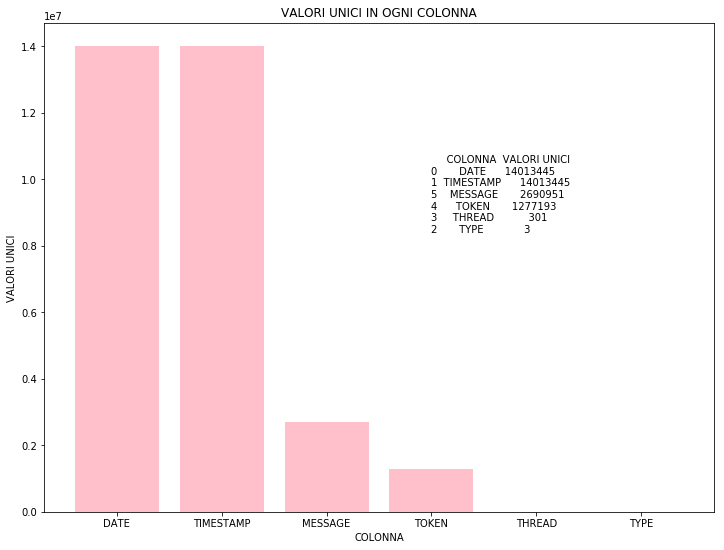

In [18]:
barrer1(b[:])

In [12]:
def most_frequent(storm_df, label):
    val_freq_df = storm_df[label].value_counts().to_frame()
    val_freq_df = pd.DataFrame({label : list(val_freq_df.index), 'OCCURENCIES' : list(val_freq_df.values)},columns=[label,'OCCURENCIES'])
    
    #check for missing value:
    if (reduce(lambda x, y: x+y, val_freq_df['OCCURENCIES']) != len(storm_df[label])):
        print "SOMETHING GONE WRONG" 
        
    return val_freq_df

In [13]:
def barrer2(d2_df, legend=False,larg=12,alt=8):
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str('occorrenze di ' + labels[0]).upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    if max(d2_df[labels[0]]) > 10:
        plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='blue')
    else:
        plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='pink')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=12)
    #plt.savefig('most_freq' + 'MESSAGE' + '.jpg',figsize=(14, 11),dpi=600)
    plt.show()
    

   ## <span style="color:red"> NB: La funzione non ordina le colonne</span> <br> <span style="color:green"> Ora dovrebbe, tenere comunque d'occhio la faccenda </span> <br> <span style="color:red"> NB: problemi con timestamp</span>

For a single column

In [14]:
%time d = most_frequent(a,'THREAD')

CPU times: user 3.57 s, sys: 8.54 ms, total: 3.58 s
Wall time: 3.59 s


## <span style="color:red"> FREQUENZA DI TIPI (1DAYLOG) </span>

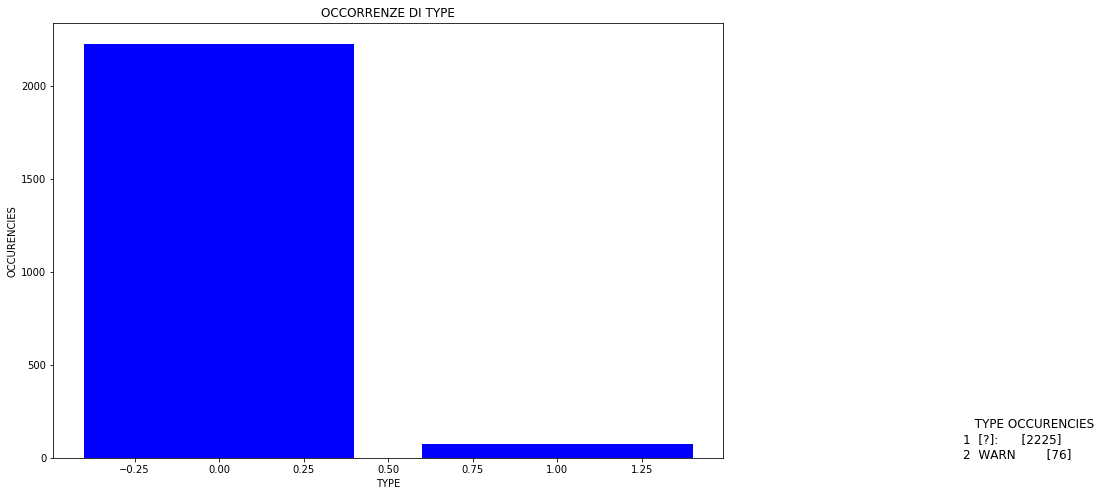

In [24]:
barrer2(most_frequent(a,'TYPE')[1:].head(20),True) #Togliere hashing per visualizzare tutto

## <span style="color:red"> FREQUENZA DI MESSAGE (HEAD, 1DAYLOG) </span>

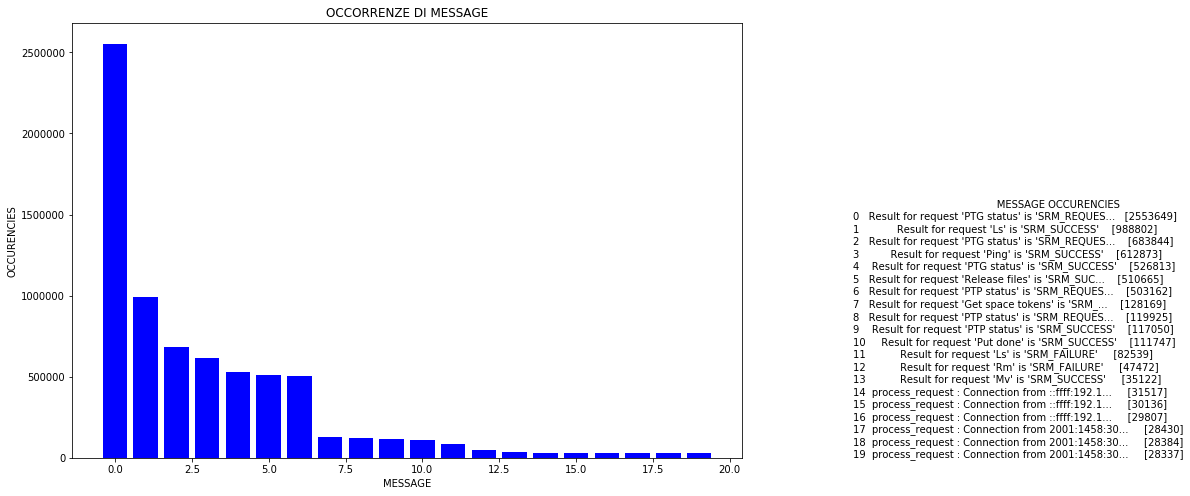

In [49]:
barrer2(most_frequent(a,'MESSAGE').head(20),True)

## <span style="color:red"> FREQUENZA DI MESSAGE (TAIL, 1DAYLOG) </span>

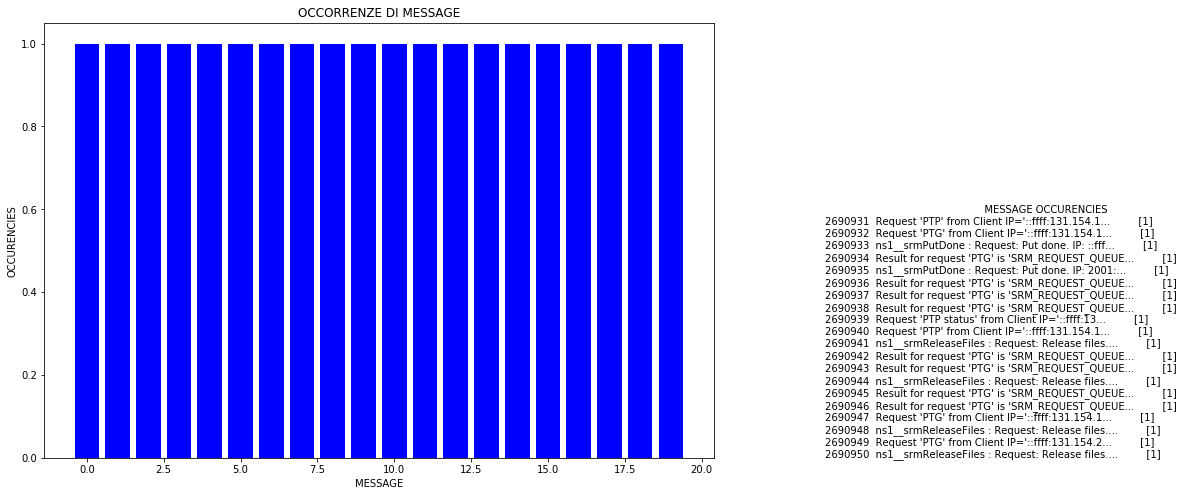

In [50]:
barrer2(most_frequent(a,'MESSAGE').tail(20),True)

## <span style="color:red"> FREQUENZA DI THREAD (TOTALE, 1DAYLOG) </span> Fare con quello intermedio


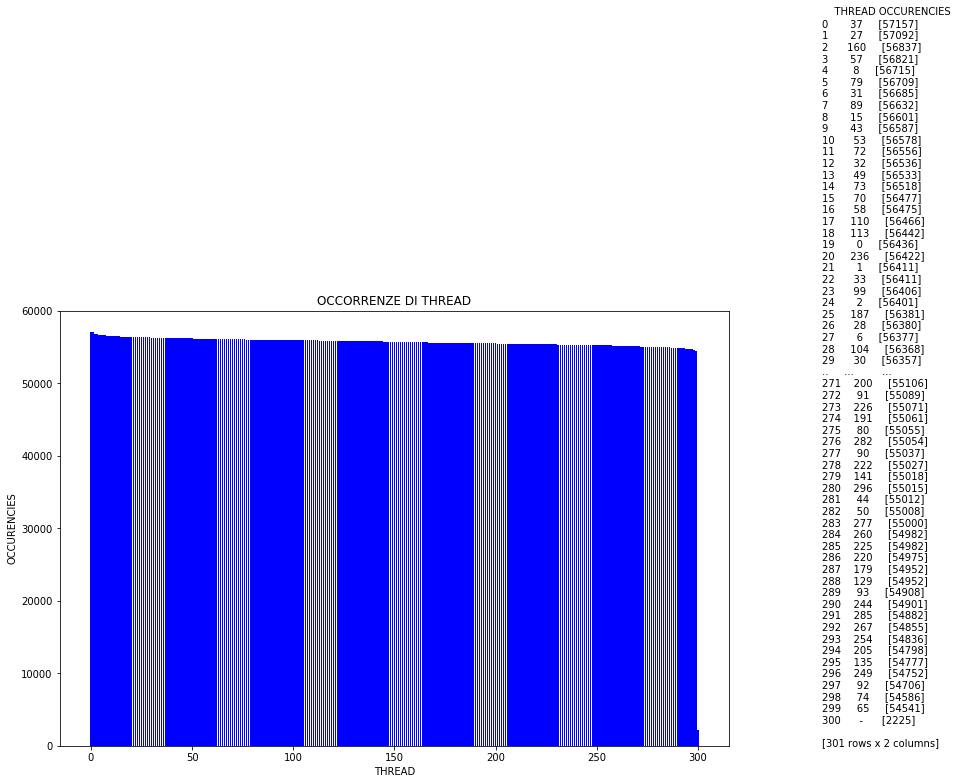

In [40]:
barrer2(d,True)

<span style="color:red"> THREAD </span> sembra che ci siano in totale 301 thread assegnati alle istanze di stoRM (per atlas?) l'andamento è significativo perchè ci mostra che una giornata più o meno i thread ricoronno tutti lo stesso numero di volte con una differenza del 2% circa tra l'occorrenza minore e la maggiore. 
IPOTESI: Questo può significare che la macchina cerca sempre di distribuire le operazioni tra tutti i thread disponibili.

## <span style="color:red"> FREQUENZA DI TOKEN (HEAD(50), 1DAYLOG) </span> Anche per log intermedio


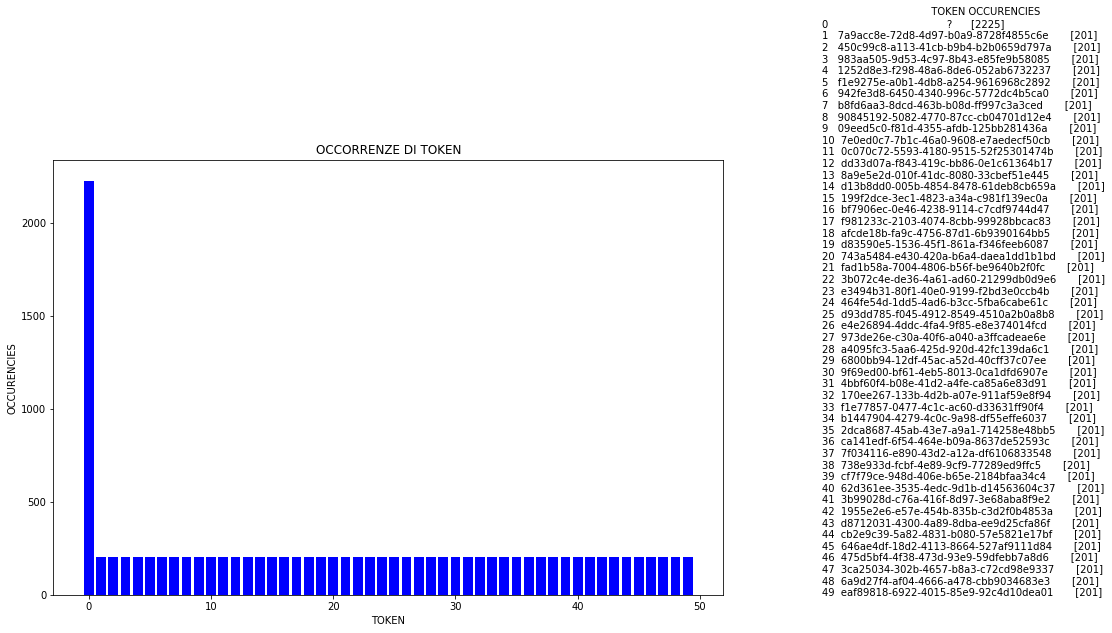

In [46]:
barrer2(most_frequent(a,'TOKEN').head(50),True)

## <span style="color:red"> FREQUENZA DI TOKEN (TAIL, 1DAYLOG) </span>


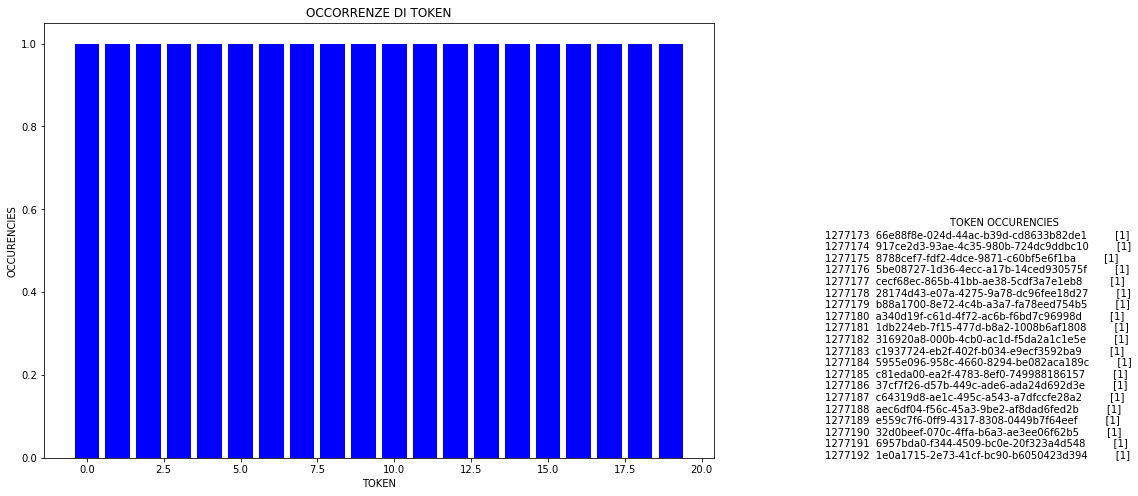

In [43]:
barrer2(most_frequent(a,'TOKEN').tail(20),True)

All columns bar plot

In [ ]:
for label in list(a):
    barrer2(most_frequent(a,label).head(10))

Per un data colonna del dataframe questa funzione trova i valori unici e ne conta la frequenza disponendoli in ordine discendente per valore di freq, selezionatone uno con N, dove N è la sua posizione a partire dall'alto la funzione ci filtra il DF restituendo un DF con tutte le righe per cui il valore della colonna è quello che abbiamo selezionato.

In [15]:
def numb_of_for(storm_df, label1, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    return filtered_df

In [16]:
def numb_of_for_val_occ(storm_df, label1, label2, N=0):
    cella_studio = most_frequent(storm_df, label1)[label1][N]
    filtered_df = storm_df.loc[storm_df[label1] == cella_studio]
    
    return most_frequent(filtered_df,label2)

In [17]:
def barrer3(d2_df, legend=False, secondo_tipo=' ',larg=12,alt=8):
    labels = list(d2_df)
    annotation = str(d2_df)
    
    x_ann = len(d2_df[labels[0]])
    y_ann = max(d2_df[labels[1]])
    
    fig = plt.figure(figsize=(larg,alt))
    plt.title(str('occorrenze di ' + labels[0]).upper())
    plt.ylabel(labels[1])
    plt.xlabel(labels[0])
    
    if max(d2_df[labels[0]]) > 10:
        plt.bar(list(range(0,len(d2_df[labels[0]]),1)), height= d2_df[labels[1]], color='blue')
    else:
        plt.bar(d2_df[labels[0]], height= d2_df[labels[1]], color='pink')
    
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if legend:
        plt.text(x_ann*1.1, y_ann*0, annotation, withdash=False,fontsize=12)
    #plt.savefig('most_freq' + 'MESSAGE' + '.jpg',figsize=(14, 11),dpi=600)
    plt.show()
    

In [ ]:
def multi_bar():
    pass

In [2]:
WARNS_OCC = numb_of_for_val_occ(a,'TOKEN','MESSAGE',1)

NameError: name 'numb_of_for_val_occ' is not defined

## <span style="color:red"> FREQUENZA DEI MESSAGE PER I 5 TOKEN PIÙ FRQUENTI </span>


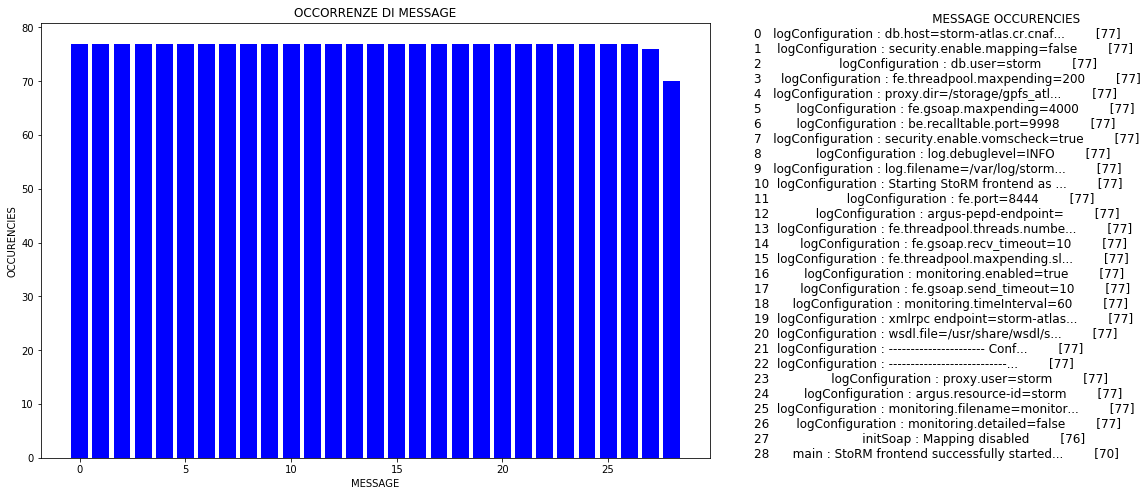

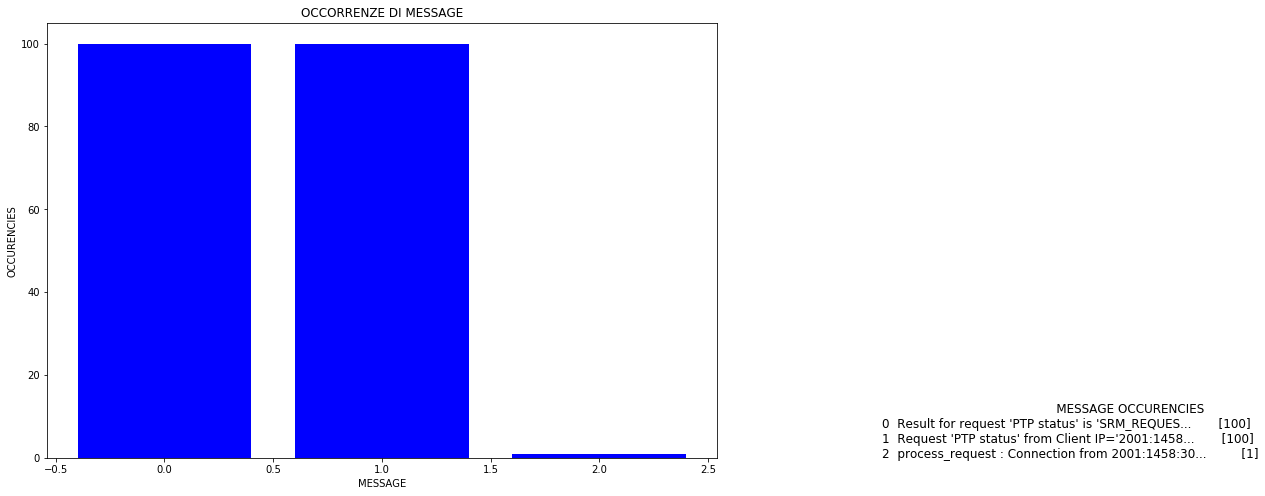

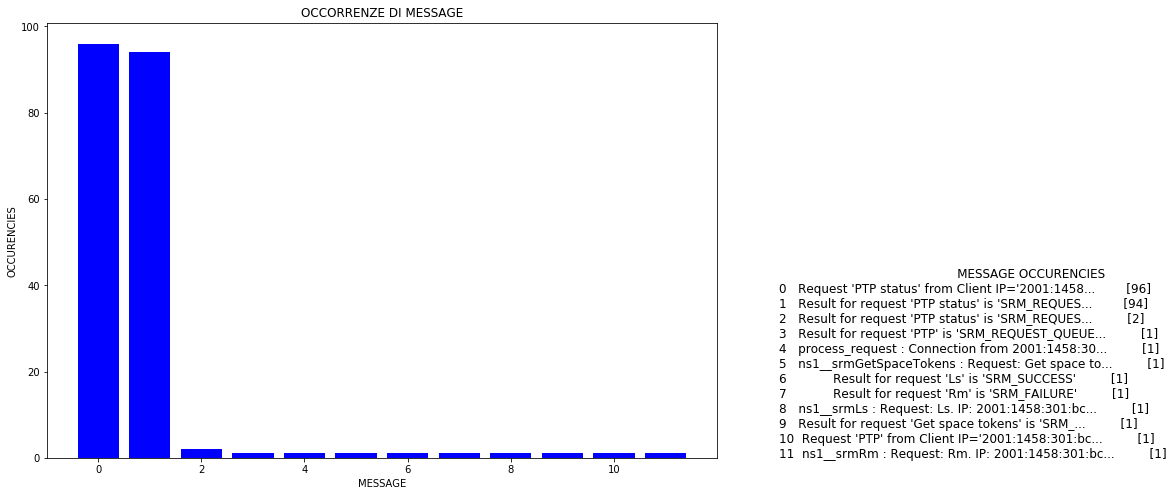

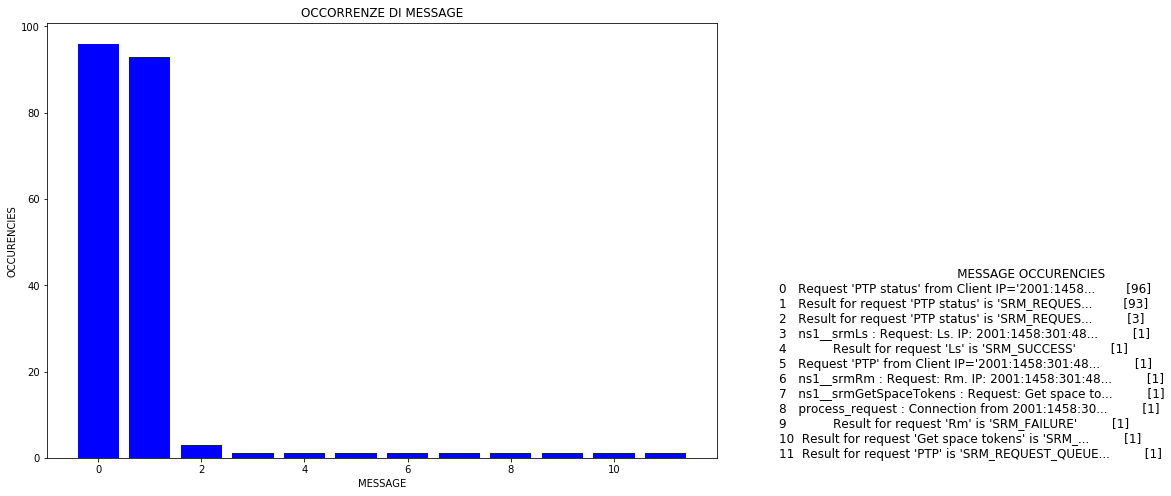

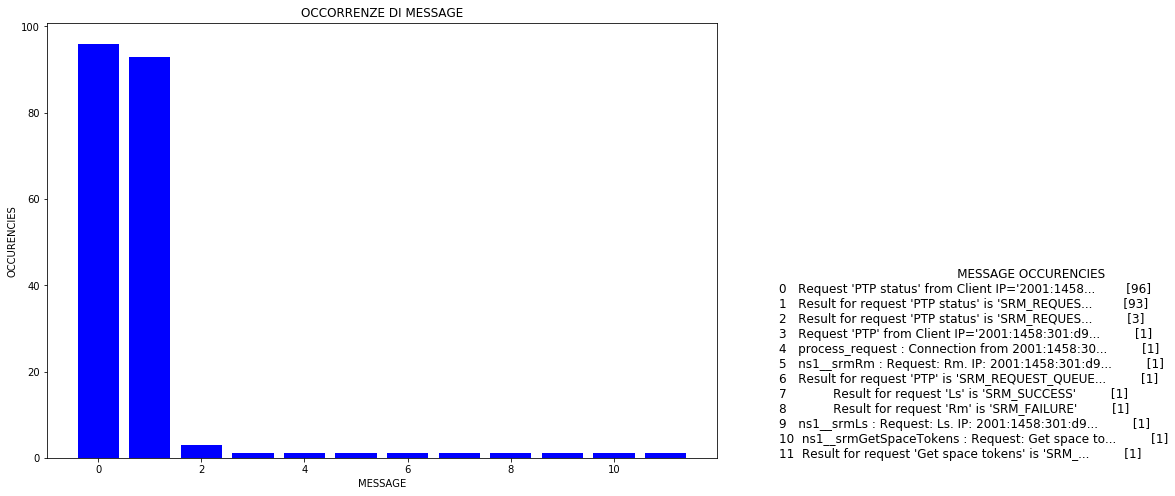

In [66]:
for i in range(5):
    MESSAGE_FOR_TOKEN = numb_of_for_val_occ(a,'TOKEN','MESSAGE',i)
    barrer3(MESSAGE_FOR_TOKEN,True)

In [ ]:
for i in range(5):
    MESSAGE_FOR_TYPE = numb_of_for_val_occ(a,'TYPE','MESSAGE',i).head(20)
    barrer3(MESSAGE_FOR_TYPE,True)

## <span style="color:red"> FREQUENZA DEI TOKEN PER I 5 THREAD PIÙ FRQUENTI </span>


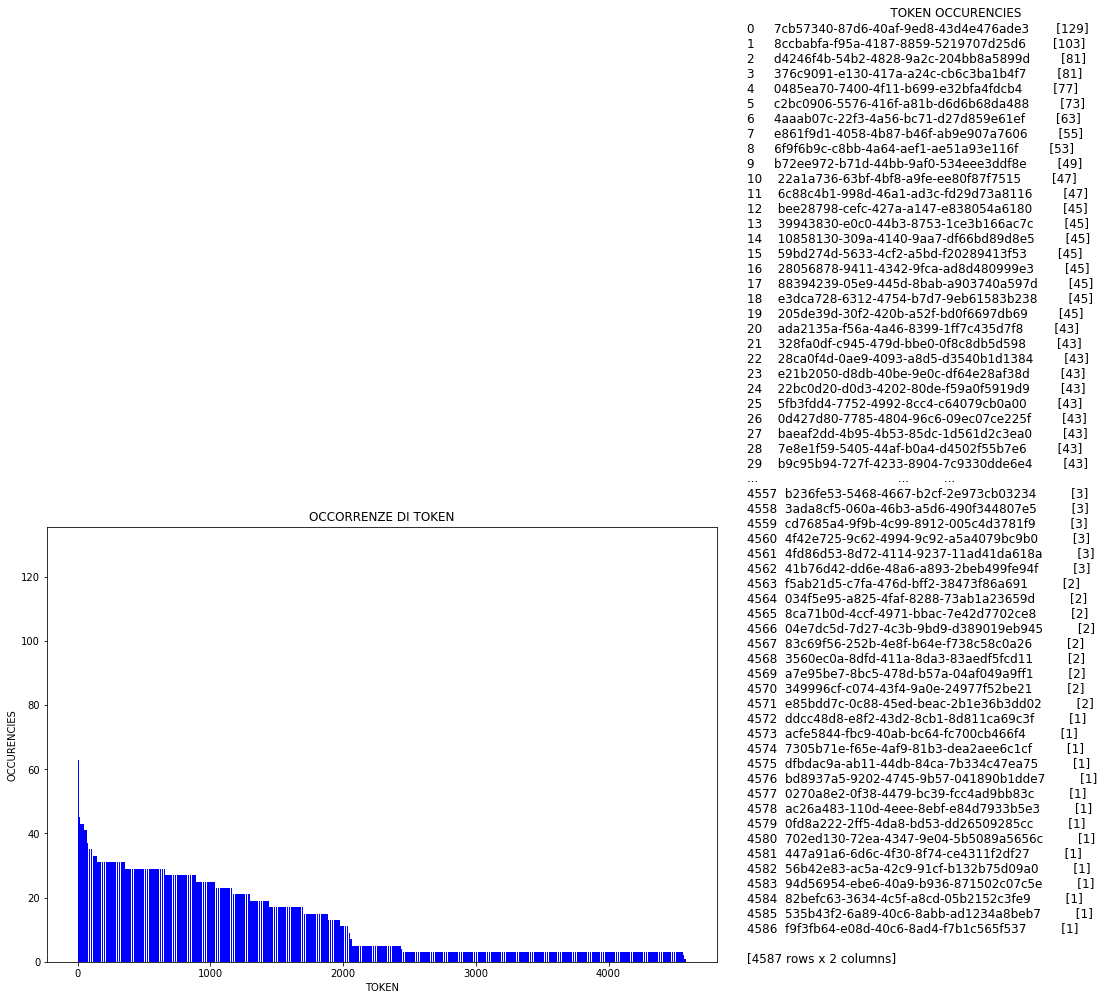

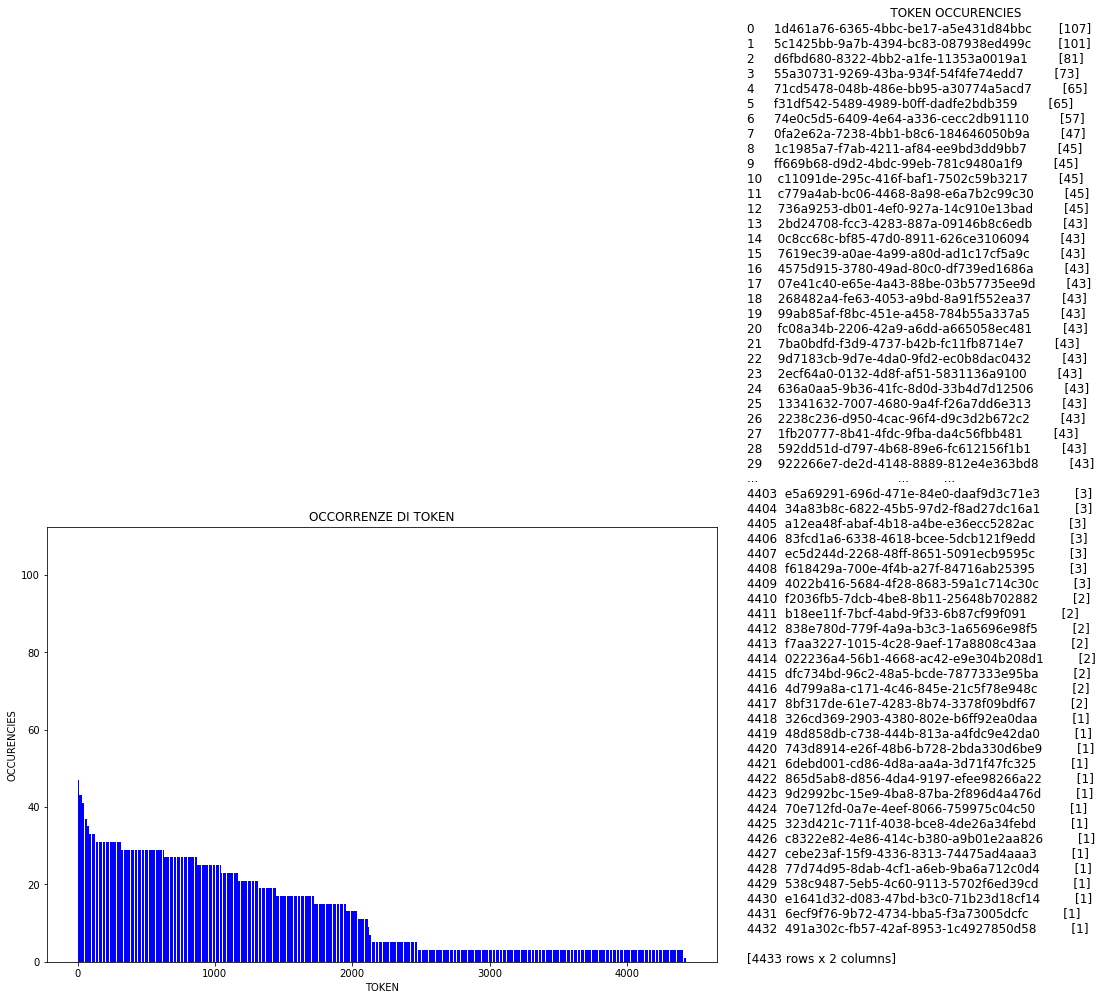

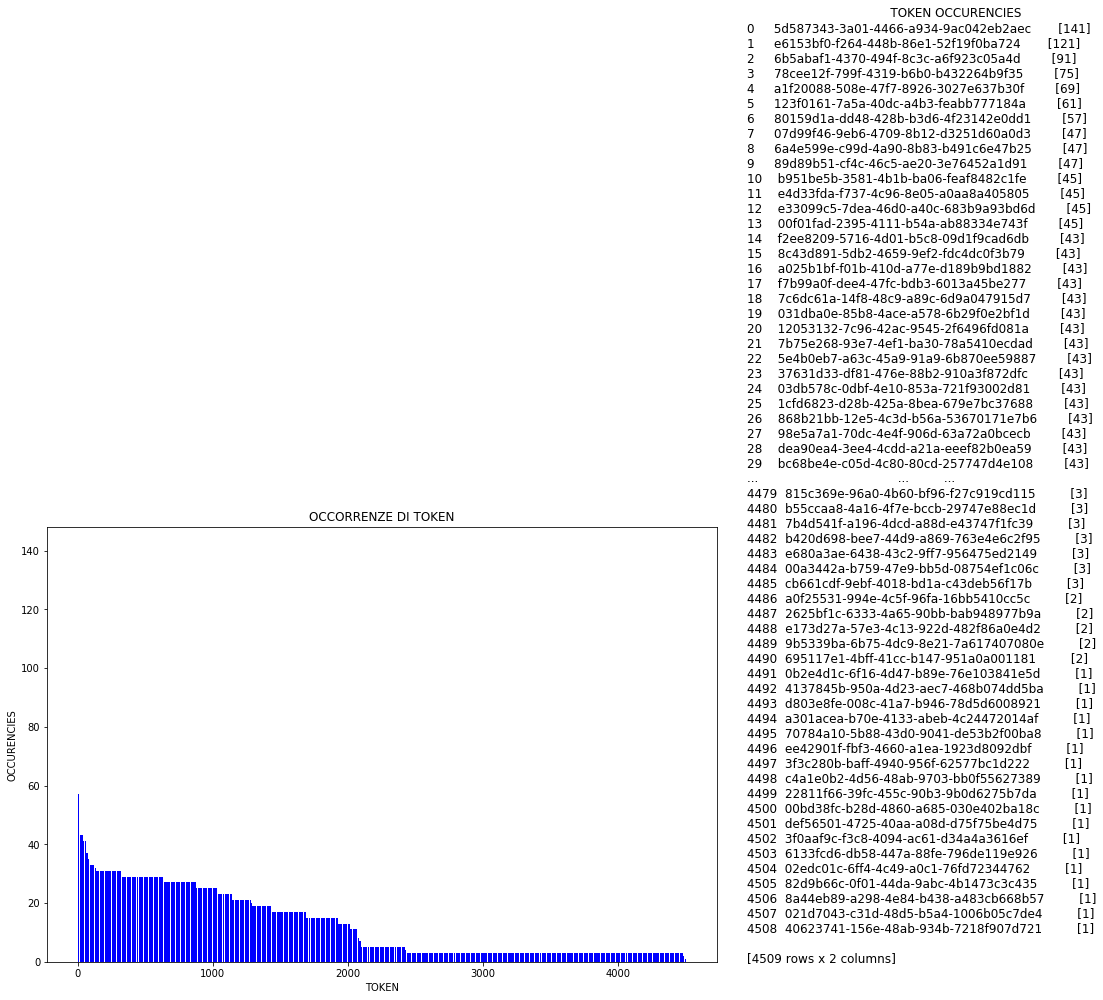

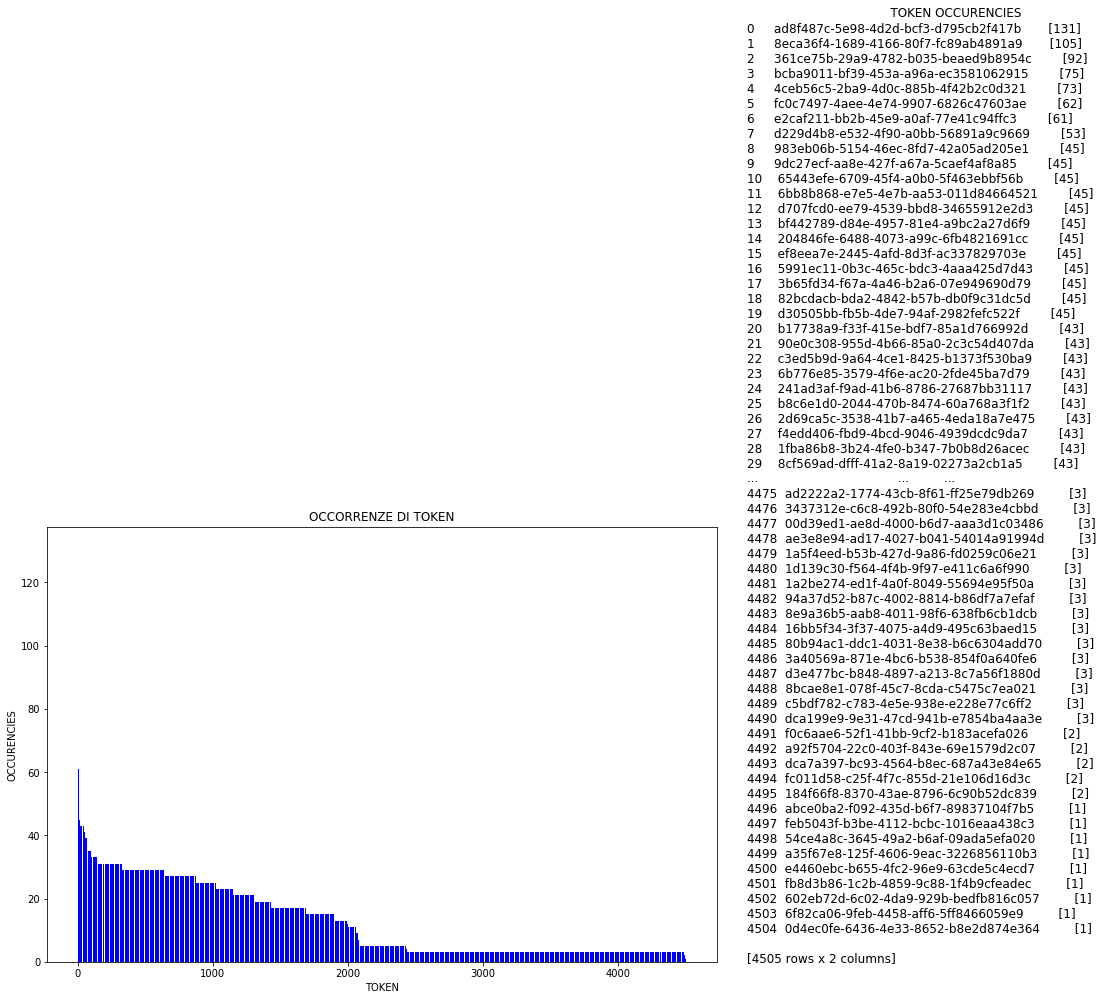

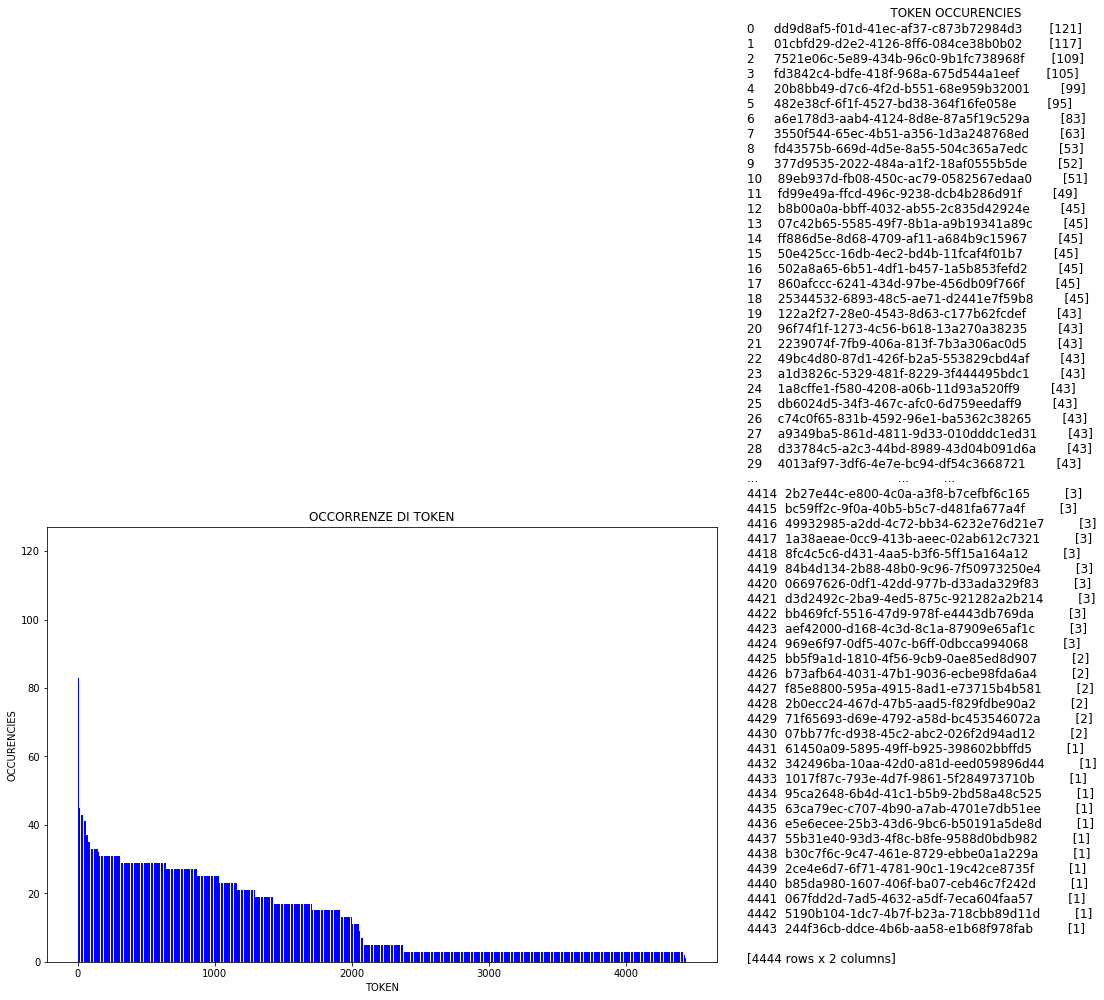

In [19]:
for i in range(5):
    TOKEN_FOR_THREAD = numb_of_for_val_occ(a,'THREAD','TOKEN',i)
    barrer3(TOKEN_FOR_THREAD,True)

## <span style="color:red"> FREQUENZA DEI THREAD PER I 5 TOKEN PIÙ FRQUENTI </span>


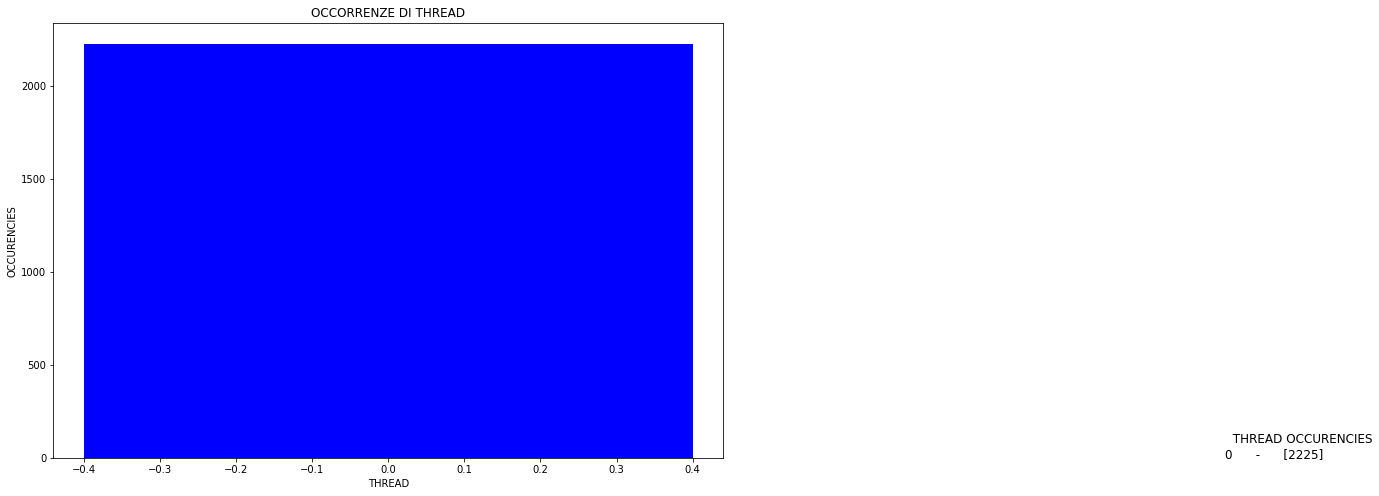

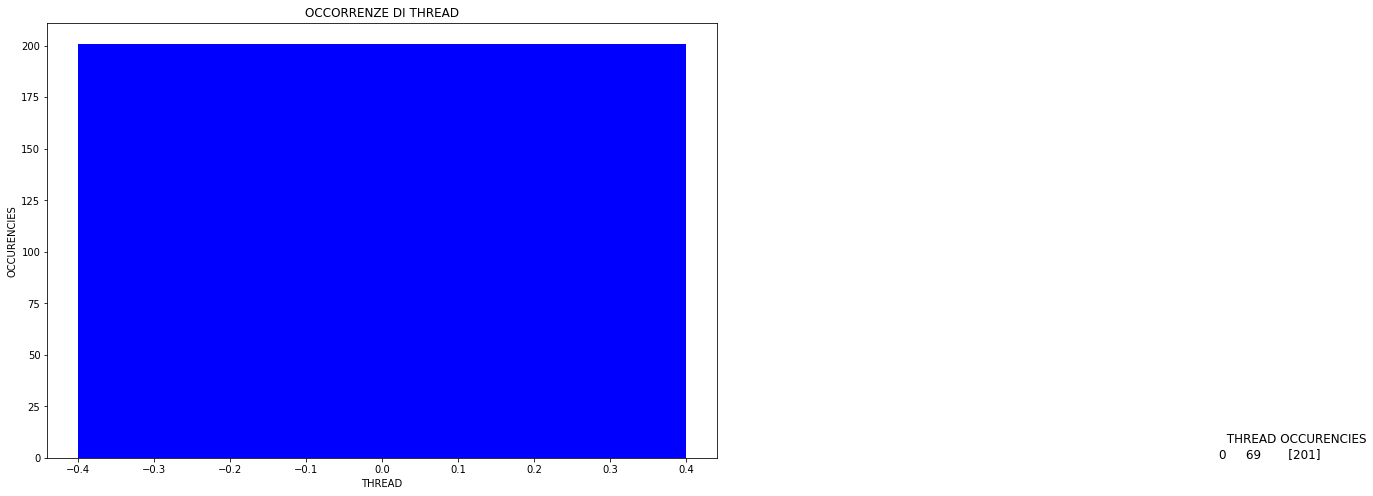

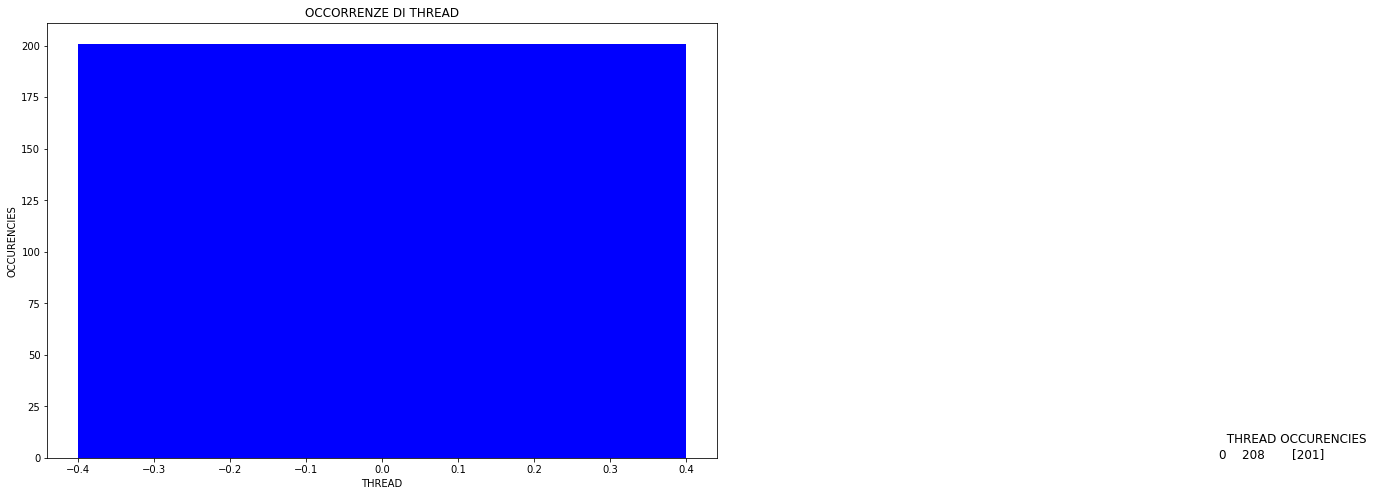

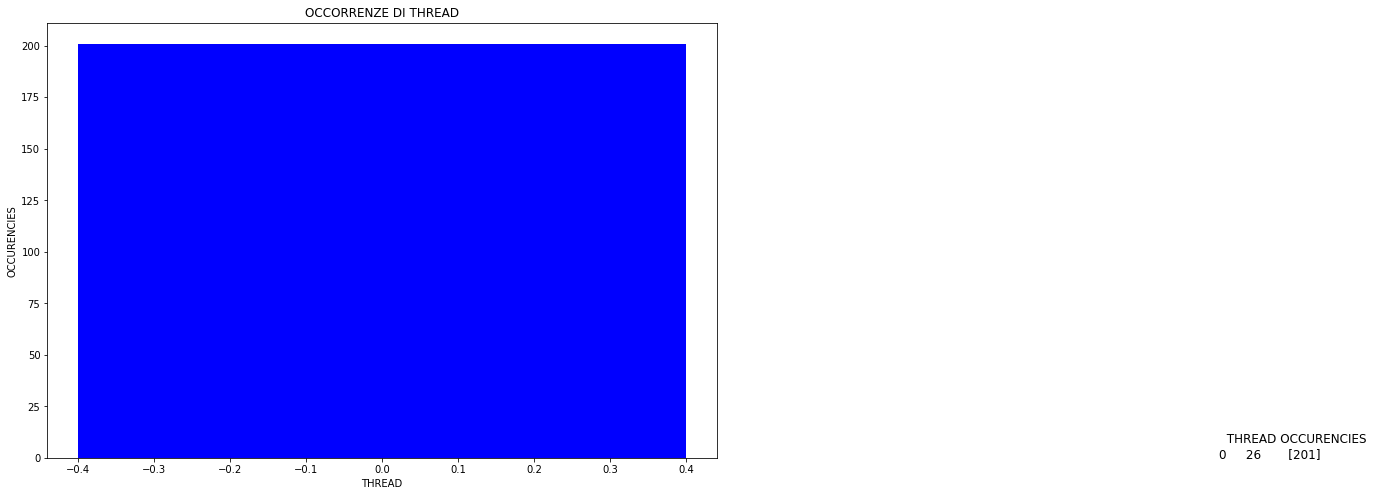

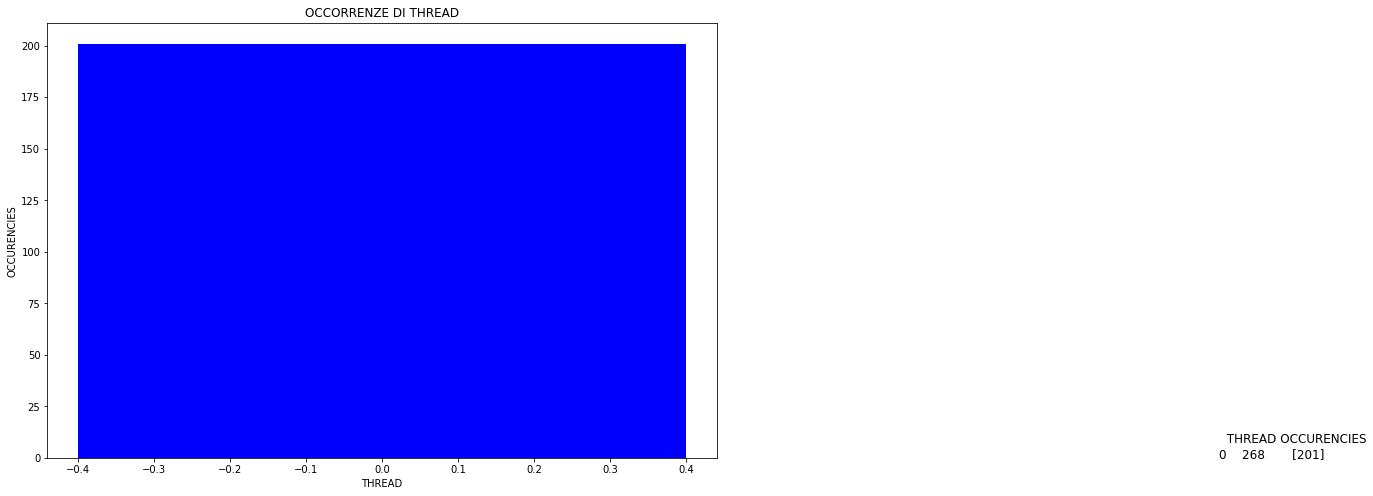

In [20]:
for i in range(5):
    THREAD_FOR_TOKEN = numb_of_for_val_occ(a,'TOKEN','THREAD',i)
    barrer3(THREAD_FOR_TOKEN,True)